**Final Project Submission**
Please fill out:

* Student name: **Group 7**
* Student pace: **Part time**
* Scheduled project review date/time: **11th September 2023**
* Instructor name: **Asha Deen**
* Blog post URL:

**INTRODUCTION**

Our data analysis project addresses a pressing issue in King County's real estate market: increasing home values. We aim to dissect the King County Sales dataset to provide actionable insights for homeowners. We explored house design's impact on sale values, analyzed the relationship between dimensions and prices, assessed numeric and categorical variables, and evaluated location's role in pricing. Our goal is to empower homeowners to make informed decisions and enhance their property values in this dynamic market.

**EXPLORATION**

In [105]:
# Import libraries

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Regression and statistical testing
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [55]:
# Load the dataset
kc_house_data = pd.read_csv('kc_house_data.csv')

# View the contents of the df
kc_house_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [56]:
# Check the structure of the df
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Observation:**

Our dataframe, kc_house_data, has 21 columns and 21,597 rows.
The columns include various types of data:
1. Integer columns: 'id', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zipcode', 'sqft_living15', and 'sqft_lot15'.
2. Float columns: 'price', 'bathrooms', 'floors', 'yr_renovated', 'lat', and 'long'.
3. Object (string) columns: 'date', 'waterfront', 'view', 'condition', 'grade', and 'sqft_basement'.
* Some columns contain missing values (NaN) like 'waterfront', 'view', and 'yr_renovated'.

In [57]:
# Perform basic statistics to understand the data
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**DATA PREPROCESSNG**

**1. Cleaning kc_house_data**



In [58]:
# Find duplicate values in House IDs
kc_house_data[kc_house_data.duplicated(subset='id', keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,NO,NONE,...,9 Better,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


**Observation:**

We've identified 353 duplicate entries in our dataset. Given that our project's primary objective is to model the most up-to-date house prices in King County, we will retain the latest entries while removing the duplicates.

In [59]:
# Convert the date column to datetime datatype
kc_house_data['date'] = pd.to_datetime(kc_house_data['date'])

# Sort by 'id' and 'date' in descending order
kc_house_data.sort_values(by=['id', 'date'], ascending=[True, False])

# Drop duplicates keeping the most recent occurence
kc_house_data.drop_duplicates(subset='id', keep='first', inplace=True)

# Confirm duplicates are dropped
print("Number of duplicates:", len(kc_house_data[kc_house_data.duplicated(subset='id', keep=False)]))

Number of duplicates: 0


`PRICE AND ID COLUMNS`

In [60]:
# Reorder columns so that the target(dependent) variable is the first column
# Exclude 'id' column
column_headers = list(kc_house_data.columns)
column_headers = [column_headers[2]]+[column_headers[1]]+column_headers[3:]
kc_house_data = kc_house_data[column_headers]

# Convert price to integer
kc_house_data = kc_house_data.astype({'price':'int'})

# Confirm changes
kc_house_data.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,2014-10-13,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


`DATE COLUMN`

In [61]:
# Split 'date' column into 'month' and 'year' columns
kc_house_data['month'] = kc_house_data['date'].dt.month
kc_house_data['year'] = kc_house_data['date'].dt.year


# Find the age of the house
kc_house_data['age'] = kc_house_data['year'] - kc_house_data['yr_built']
# Confirm changes
kc_house_data.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,age
0,221900,2014-10-13,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,59
1,538000,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,63
2,180000,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015,82
3,604000,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014,49
4,510000,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28


In [62]:
# Convert the months into seasons of the year
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

kc_house_data['season'] = kc_house_data['month'].map(month_to_season)
kc_house_data

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,age,season
0,221900,2014-10-13,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,0.0,98178,47.5112,-122.257,1340,5650,10,2014,59,Fall
1,538000,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,63,Winter
2,180000,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,...,NaN,98028,47.7379,-122.233,2720,8062,2,2015,82,Winter
3,604000,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,0.0,98136,47.5208,-122.393,1360,5000,12,2014,49,Winter
4,510000,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,2014-05-21,3,2.50,1530,1131,3.0,NO,NONE,Average,...,0.0,98103,47.6993,-122.346,1530,1509,5,2014,5,Spring
21593,400000,2015-02-23,4,2.50,2310,5813,2.0,NO,NONE,Average,...,0.0,98146,47.5107,-122.362,1830,7200,2,2015,1,Winter
21594,402101,2014-06-23,2,0.75,1020,1350,2.0,NO,NONE,Average,...,0.0,98144,47.5944,-122.299,1020,2007,6,2014,5,Summer
21595,400000,2015-01-16,3,2.50,1600,2388,2.0,NaN,NONE,Average,...,0.0,98027,47.5345,-122.069,1410,1287,1,2015,11,Winter


`BEDROOMS COLUMN`

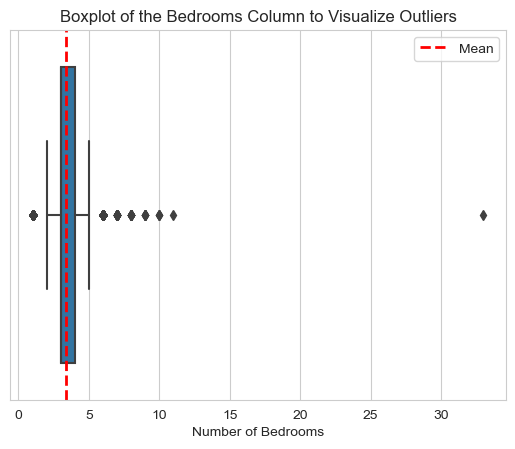

In [63]:
# Plot a boxplot to visualize the column data
sns.set_style("whitegrid")
sns.boxplot(x = kc_house_data.bedrooms)
plt.axvline(kc_house_data.bedrooms.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.xlabel('Number of Bedrooms')
plt.title('Boxplot of the Bedrooms Column to Visualize Outliers')
plt.legend();

**Observation:**

The majority of houses in King County have bedrooms typically ranging from 1 to 5 bedrooms. Some homes have between 5 and roughly 11 bedrooms. However, there are extreme outliers with as many as 33 bedrooms. To ensure the accuracy of our analysis and modeling, we will exclude the entry with 33 bedrooms as it could significantly skew our results.

In [13]:
# Remove the extreme outlier for initial model
kc_house_data.drop(kc_house_data[kc_house_data.bedrooms == 33].index, inplace=True)

# Confirm Drop
kc_house_data['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

`BATHROOMS COLUMN`

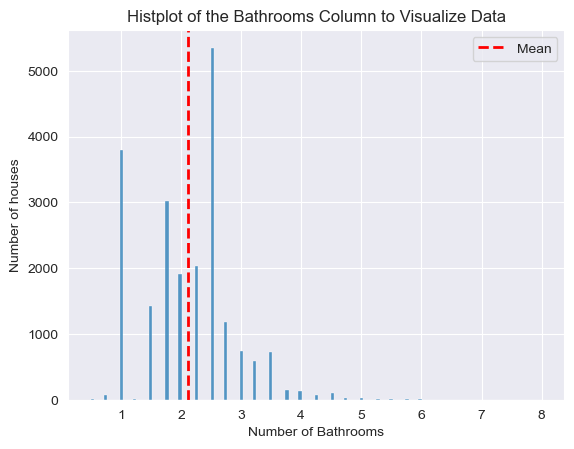

In [14]:
# Plot a histplot to visualize the bathrooms data
sns.set_style("darkgrid")
sns.histplot(kc_house_data.bathrooms)
plt.axvline(kc_house_data.bathrooms.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of houses')
plt.title('Histplot of the Bathrooms Column to Visualize Data')
plt.legend();

**Observation:**

Houses with fewer than one bathroom are not aligned with our analysis and model, which focuses on assessing decent housing setups. Therefore, we should remove this data from our dataset.

The bathrooms data is positively skewed.

In [15]:
# Remove houses with less than 1 bathroom
kc_house_data.drop(kc_house_data[kc_house_data.bathrooms < 1].index, inplace=True)

# Confirm Drop
kc_house_data['bathrooms'].value_counts()

2.50    5352
1.00    3794
1.75    3019
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

`WATERFRONT COLUMN`

In [16]:
# View the frequencies of Yes and No
kc_house_data.waterfront.value_counts()

NO     18857
YES      141
Name: waterfront, dtype: int64

In [17]:
# Explore missing values
print("Number of missing values:", kc_house_data.waterfront.isna().sum())

Number of missing values: 2347


In [18]:
# Calculate the probabilities for each unique value in the 'waterfront' column
probabilities = kc_house_data['waterfront'].value_counts(normalize=True).to_dict()

# Apply a lambda function to impute missing values based of probalibility
kc_house_data['waterfront'] = kc_house_data['waterfront'].apply(
    lambda x: np.random.choice(list(probabilities.keys()), p=list(probabilities.values())) if pd.isna(x) else x)

# Confirm there are no missing values
print("Number of missing values:", kc_house_data.waterfront.isna().sum())

# View frequencies
kc_house_data.waterfront.value_counts()

Number of missing values: 0


NO     21187
YES      158
Name: waterfront, dtype: int64

`VIEW COLUMN`

In [19]:
# View the counts of occurences
kc_house_data.view.value_counts()

NONE         19190
AVERAGE        950
GOOD           504
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

In [20]:
# Check for missing values
print('Number of missing values:', kc_house_data.view.isna().sum())

Number of missing values: 63


In [22]:
# Use Probability to fill the missing values
view_probabilities = list(kc_house_data['view'].value_counts(normalize=True).values)
unique_values2 = kc_house_data['view'].dropna().unique()

def replace_nan_with_random(x):
    if pd.isna(x):
        return np.random.choice(unique_values2, p=view_probabilities)
    else:
        return x

kc_house_data['view'] = kc_house_data['view'].apply(replace_nan_with_random)

# View the new count occurences  after filling null
kc_house_data.view.value_counts()

NONE         19242
AVERAGE        952
GOOD           510
FAIR           328
EXCELLENT      313
Name: view, dtype: int64

`GRADE COLUMN`

In [23]:
# Check for missing values
print("Number of missing values:",kc_house_data['grade'].isna().sum())

Number of missing values: 0


In [24]:
# View the counts of occurences
kc_house_data['grade'].value_counts()

7 Average        8871
8 Good           6040
9 Better         2606
6 Low Average    1968
10 Very Good     1130
11 Excellent      396
5 Fair            219
12 Luxury          88
4 Low              14
13 Mansion         13
Name: grade, dtype: int64

`SQFT BASEMENT COLUMN`

In [25]:
# Check the count of occurences
kc_house_data.sqft_basement.value_counts()

0.0       12659
?           451
600.0       216
700.0       205
500.0       205
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In the 'sqft_basement' column, we've noticed that some entries are marked with '?' as a placeholder. To address this, we aim to replace these '?' entries. Our approach involves identifying columns with the highest positive correlation to 'sqft_basement' and using forward-fill to substitute the '?' values.

In [26]:
# Replace the '?' with nan placeholder

kc_house_data.sqft_basement.replace('?', float(np.nan), inplace=True)

In [27]:
kc_house_data = kc_house_data.astype({'sqft_basement':'float'})

kc_house_data.corr()['sqft_basement'].nlargest()

sqft_basement    1.000000
sqft_living      0.433165
price            0.324001
bedrooms         0.308287
bathrooms        0.281120
Name: sqft_basement, dtype: float64

There is a moderate positive correlation (0.43) between the size of the basement ('sqft_basement') and the overall living space size ('sqft_living'). This suggests that, on average, as the size of the basement increases, the size of the living space tends to increase as well.

In [28]:
# Sort 'sqft_living' in ascending order
kc_house_data.sort_values(by=['sqft_living'], ascending=True)

# Forward fill the 'sqft_basement' column
kc_house_data['sqft_basement'].fillna(method='ffill', inplace=True)

# Confirm change
kc_house_data.sqft_basement.value_counts()

0.0       12924
600.0       221
500.0       213
700.0       207
800.0       206
          ...  
2720.0        1
518.0         1
374.0         1
784.0         1
248.0         1
Name: sqft_basement, Length: 303, dtype: int64

`SELECTING RELEVANT COLUMNS FOR ANALYSIS MODELLING`

In [29]:
columns_to_drop = ['yr_renovated', 'month', 'date']
kc_house_data.drop(columns=columns_to_drop, inplace=True)
kc_house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year,age,season
0,221900,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,...,0.0,1955,98178,47.5112,-122.257,1340,5650,2014,59,Fall
1,538000,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,...,400.0,1951,98125,47.7210,-122.319,1690,7639,2014,63,Winter
2,180000,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,...,0.0,1933,98028,47.7379,-122.233,2720,8062,2015,82,Winter
3,604000,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,...,910.0,1965,98136,47.5208,-122.393,1360,5000,2014,49,Winter
4,510000,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,...,0.0,1987,98074,47.6168,-122.045,1800,7503,2015,28,Winter


**HYPOTHESIS TESTING**

We will perform hypothesis tests to determine the following:


1.   Does waterfront influence the view rating of houses? Is the influence positive?
2.  Does  



**`Does waterfront influence the view rating of houses?`**

In [33]:
# Create a contingency table between 'view' and 'waterfront'
contingency_table = pd.crosstab(kc_house_data['view'], kc_house_data['waterfront'])
contingency_table

waterfront,NO,YES
view,,
AVERAGE,944,6
EXCELLENT,192,120
FAIR,328,1
GOOD,493,14
NONE,19232,15


In [34]:
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than alpha to make a decision
if p < alpha:
    print("Reject the null hypothesis: 'view' and 'waterfront' are dependent.")
else:
    print("Fail to reject the null hypothesis: 'view' and 'waterfront' are independent.")


Reject the null hypothesis: 'view' and 'waterfront' are dependent.


In [35]:

# Define a mapping from view categories to numeric values
view_rating_mapping = {
    'NONE': 0,
    'AVERAGE': 1,
    'GOOD': 2,
    'FAIR': 3,
    'EXCELLENT': 4
}

# Convert 'view_rating' to numeric values
kc_house_data['view_rating_numeric'] = kc_house_data['view'].map(view_rating_mapping)

# Create subsets of 'view_rating_numeric' based on 'waterfront' categories
view_rating_waterfront_yes = kc_house_data[kc_house_data['waterfront'] == 'YES']['view_rating_numeric']
view_rating_waterfront_no = kc_house_data[kc_house_data['waterfront'] == 'NO']['view_rating_numeric']

# Perform ANOVA test
result = f_oneway(view_rating_waterfront_yes, view_rating_waterfront_no)

# Extract the p-value from the ANOVA result
p_value = result.pvalue

# Set the significance level
alpha = 0.05

# Check if the p-value is less than alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis: 'waterfront' has a significant influence on view ratings.")
else:
    print("Fail to reject the null hypothesis: 'waterfront' does not have a significant influence on view ratings.")


Reject the null hypothesis: 'waterfront' has a significant influence on view ratings.
